**Linear Regression**

its a statistical method used to model the relationship between a dependent variable and one or more independent variables. It aims to find the best-fitting linear equation that describes how changes in the independent variables affect the dependent variable.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [6]:
age_of_car = [5,7,8,7,2,17,2,9,4,11,12,9,6]
speed_of_car = [99,86,87,88,111,86,103,87,94,78,77,85,86]

In [9]:
slope, intercept, r,p,std_err = stats.linregress(age_of_car,speed_of_car)

In [10]:
def func(age_of_car):
    return slope * age_of_car + intercept

In [11]:
mymodel = list(map(func,age_of_car))

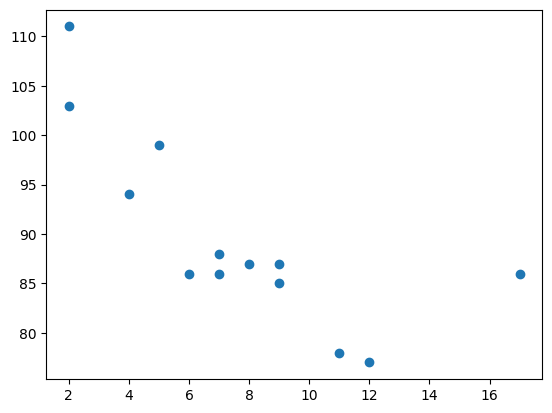

In [12]:
plt.scatter(age_of_car,speed_of_car)

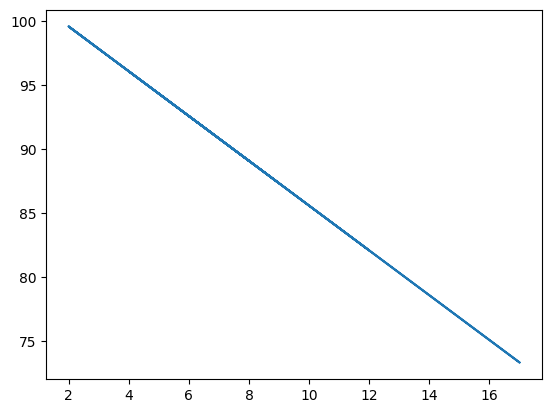

In [13]:
plt.plot(age_of_car,mymodel)
plt.show()

if the line is linear, data is fit for linear regression, otherwise not.

In [14]:
speed = func(10)
print(speed)

85.59308314937454


In [16]:
df = pd.read_csv('../sample_data/USA_housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
df.shape

(5000, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [19]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [20]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
df.drop('Address',axis = 1)

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [24]:
x = df.drop('Price',axis =1)
y = df['Price'] 

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

random state - it takes some part from the dataset, if not provided, model will give different result each time you run it.

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
lm.coef_

array([2.15898874e+01, 1.66102501e+05, 1.19895936e+05, 1.90107101e+03,
       1.52315025e+01])

In [30]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns = ['coeff'])
cdf

,coeff
Avg. Area Income,21.589887
Avg. Area House Age,166102.501246
Avg. Area Number of Rooms,119895.936402
Avg. Area Number of Bedrooms,1901.071012
Area Population,15.231503


In [32]:
predictions = lm.predict(x_test)

In [33]:
predictions

array([1310035.96931558, 1238811.85458523, 1245265.83079157, ...,
       1024496.94962135, 1548581.80349705, 1032639.16178958],
      shape=(1650,))

In [34]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
908     1.383967e+06
2114    1.203090e+06
3896    8.592087e+05
1627    1.509423e+06
2873    9.987020e+05
Name: Price, Length: 1650, dtype: float64

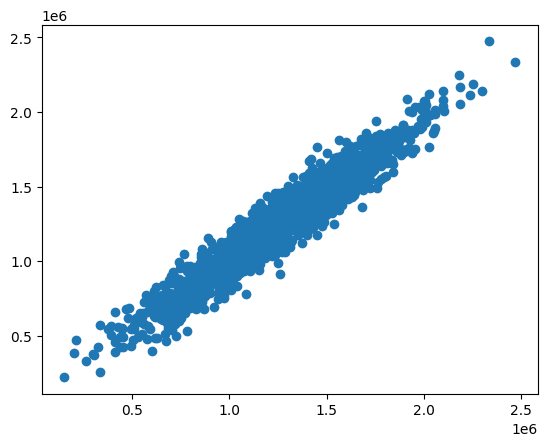

In [35]:
plt.scatter(y_test,predictions)

C:\Users\megha\AppData\Local\Temp\ipykernel_14248\3938448230.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions),bins = 50)


<Axes: xlabel='Price', ylabel='Density'>

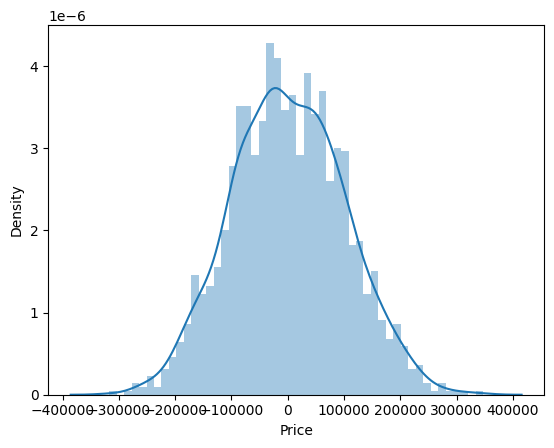

In [39]:
import seaborn as sns
sns.distplot((y_test - predictions),bins = 50)

In [40]:
from sklearn import metrics
print('MAE',metrics.mean_squared_error(y_test,predictions))
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 10013679978.582382
MAE 80893.81190769987
RMSE 100068.3765161721
